### Plot Graph for Trained Model

In [1]:
import pickle
saved_scores=[]
with open('saved/scores.list', 'rb') as scores_file:
    saved_scores = pickle.load(scores_file)

In [2]:
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy
def movingaverage(interval, window_size):
    window= numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

In [4]:
scores_av = movingaverage(saved_scores, 100)

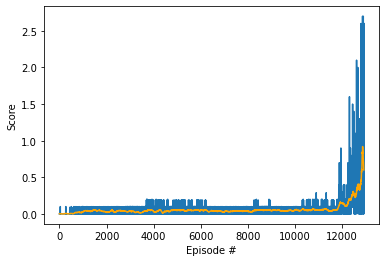

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(saved_scores)+1), saved_scores)
plt.plot(np.arange(1, len(scores_av)+1), scores_av,color='orange')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Test Trained Model  

In [6]:
from unityagents import UnityEnvironment
import numpy as np

### Load Environment 

Load Environment according to your OS

In [7]:
env = UnityEnvironment(file_name="../Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [8]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [31]:
from ddpg_agent import Agent
agent=[]
for i in range(2):
    agent.append(Agent(state_size=48, action_size=2, random_seed=4))

In [32]:
import torch
import numpy as np
from collections import deque

In [33]:
state_dict = torch.load('saved/solution_actor_local_1.pth')
del state_dict['bn1.num_batches_tracked']
agent[0].actor_local.load_state_dict(state_dict)

# state_dict = torch.load('saved/solution_critic_local_1.pth')
# del state_dict['bn1.num_batches_tracked']
# agent[0].critic_local.load_state_dict(state_dict)

state_dict = torch.load('saved/solution_actor_target_1.pth')
del state_dict['bn1.num_batches_tracked']
agent[0].actor_target.load_state_dict(state_dict)


# state_dict = torch.load('saved/solution_critic_target_1.pth')
# del state_dict['bn1.num_batches_tracked']
# agent[0].critic_target.load_state_dict(state_dict)

In [34]:
state_dict = torch.load('saved/solution_actor_local_2.pth')
del state_dict['bn1.num_batches_tracked']
agent[1].actor_local.load_state_dict(state_dict)

# state_dict = torch.load('saved/solution_critic_local_2.pth')
# del state_dict['bn1.num_batches_tracked']
# agent[1].critic_local.load_state_dict(state_dict)

state_dict = torch.load('saved/solution_actor_target_2.pth')
del state_dict['bn1.num_batches_tracked']
agent[1].actor_target.load_state_dict(state_dict)


# state_dict = torch.load('saved/solution_critic_target_2.pth')
# del state_dict['bn1.num_batches_tracked']
# agent[1].critic_target.load_state_dict(state_dict)

In [35]:
num_agents=2
max_t=1000
action_size=2
for i_episode in range(1, 6):
    env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
    states = env_info.vector_observations              # get the current state (for each agent)
    states = np.reshape(states, (1, 48)) 

    score = np.zeros(num_agents)                       # initialize the score (for each agent)

    for t in range(max_t):
        actions=np.zeros((2,action_size))
        for i in range(2):
            actions[i] = agent[i].act(states)                    # select an action (for each agent):

        actions_ = np.reshape(actions, (1, 4))

        env_info = env.step(actions_)[brain_name]       # send all actions to tne environment

        next_states = env_info.vector_observations     # get next state (for each agent)
        next_states = np.reshape(next_states, (1, 48)) 

        rewards = env_info.rewards                     # get reward (for each agent)
        dones = env_info.local_done                    # see if episode finished

        for i_agent in range(num_agents):
            agent[i_agent].step(states,
                   actions[i_agent],
                   rewards[i_agent],
                   next_states,
                   dones[i_agent], t)              # update the system

        score += rewards                               # update the score (for each agent)
        states = next_states                           # roll over states to next time step

        if np.any(dones):                              # exit loop if episode finished
            break

    print('Score for the episode {} is {:.4f}'.format(i_episode,np.max(score)))


Score for the episode 1 is 0.2000
Score for the episode 2 is 0.5900
Score for the episode 3 is 0.0000
Score for the episode 4 is 0.0000
Score for the episode 5 is 0.0000


In [36]:
env.close()